# Example 1: Load CIFAR10 dataset

In [2]:
from keras.datasets import cifar10

Using TensorFlow backend.
/home/pi/envs/face/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.4 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/home/pi/envs/face/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 432, got 412
  return f(*args, **kwds)


In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 98s 1us/step


In [6]:
print("X_train shape:" + str(X_train.shape))
print(y_train.shape)

X_train shape:(50000, 32, 32, 3)
(50000, 1)


In [10]:
print("y_train shape:" + str(X_test.shape))
print(y_test.shape)

y_train shape:(10000, 28, 28)
(10000,)


# Example 2: Load MNIST dataset

In [151]:
from keras.datasets import mnist
from keras.utils import np_utils  

In [152]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [153]:
print("X_train shape:" + str(X_train.shape))
print(y_train.shape)

X_train shape:(60000, 28, 28)
(60000,)


In [154]:
print("y_train shape:" + str(y_train.shape))
print(y_test.shape)

y_train shape:(60000,)
(10000,)


# Import pyplot to plot

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

# View a record in dataset

8
(28, 28)


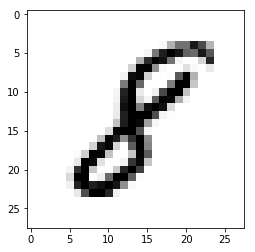

In [156]:
image_index = 7777

print(y_train[image_index])
print(X_train[image_index].shape)
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()

## Data Engineering

In [157]:
# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [158]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

MemoryError: 

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
y_TrainOneHot = np_utils.to_categorical(y_train)  
y_TestOneHot = np_utils.to_categorical(y_test)  
print(y_test[0])
print(y_TestOneHot[0])

In [159]:
print('X_train shape:', X_train.shape)
print('Number of images in x_train', X_train.shape[0])
print('Number of images in x_test', X_test.shape[0])


X_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


## Training

In [160]:
from keras.layers import Activation
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [161]:
input_shape = (28, 28, 1)

In [162]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(5,5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5,5), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
__________

In [166]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
train_history = model.fit(x=X_train,y=y_TrainOneHot, validation_split=0.2, validation_data=None, batch_size=50, epochs=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 216s 5ms/step - loss: 0.1499 - acc: 0.9581 - val_loss: 0.0757 - val_acc: 0.9773


In [167]:
print(train_history.history)

{'val_loss': [0.07567520439731652], 'acc': [0.9580833324541648], 'loss': [0.14987136259721107], 'val_acc': [0.9773333368202051]}


In [168]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')

    plt.show()

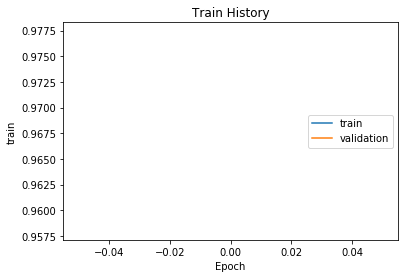

In [169]:
show_train_history(train_history, 'acc', 'val_acc')

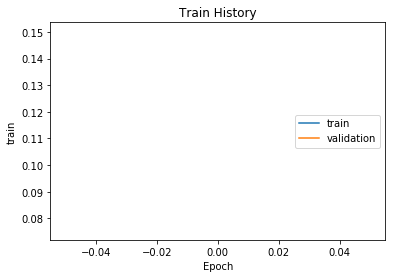

In [170]:
show_train_history(train_history, 'loss', 'val_loss')

In [176]:
test_error_rate = model.evaluate(X_test, y_TestOneHot, verbose=0)
print("The mean squared error (MSE) for the test data set is: {}".format(test_error_rate))

The mean squared error (MSE) for the test data set is: [0.08308500300454907, 0.9777]


In [ ]:
from keras import models

#Export
model.save("trained_model.h5")

#Import
trained_model = models.load_model("trained_model.h5")

(28, 28, 3)


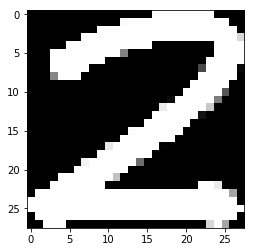

(1, 28, 28, 1)
[[0.39715615 0.0024001  0.06054664 0.00464066 0.00301769 0.01947736
  0.01618024 0.00145217 0.40150917 0.09361985]]


In [174]:
import cv2
img = cv2.imread("2.png")
img = cv2.resize(img, (28, 28)) 
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='Greys')
plt.show()
img = img.reshape(1, 28, 28, 1)
print(img.shape)
predictions = trained_model.predict(img)
print(predictions)
